## Early code

I didn't use os path join and other best practices for file traversal. Please check for file paths

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_no=1
import tifffile 

In [5]:
import os
path="/home/saab/Desktop/Lung_IHC_TIFF_s01.tif"

In [6]:
img=tifffile.imread(path)

In [7]:
#imgx=cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
#imgz=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#l1,a1,b1=cv2.split(imgx)
#emp=np.empty(l1.shape,np.uint8)
#a_channel=cv2.merge((emp,a1,emp))
img2=cv2.GaussianBlur(img,(11,11),0)

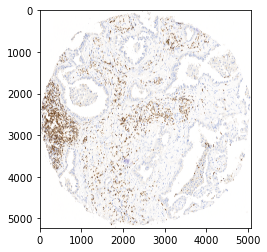

In [8]:
plt.imshow(img2)

In [42]:
#plt.imshow(imgx)

In [43]:
#a1.shape
#plt.imshow(a1)

In [9]:
pixel_values = img2.reshape((-1, 3))

In [10]:
pixel_values = np.float32(pixel_values)

In [11]:
iterations=30
epsilon_value=0.01  #difference between clustered colours
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,iterations, epsilon_value)

In [12]:
k = 4 #number of unique colors
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 5, cv2.KMEANS_RANDOM_CENTERS)

In [13]:
labels_x=np.reshape(labels,(img2.shape[0],img2.shape[1]))

In [13]:
labels_x.shape

(256, 256)

In [62]:
plt.imsave("C:\\Users\\Abu Bakr\\Desktop\\test_img.png",labels_x,cmap='gray')

In [14]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [16]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

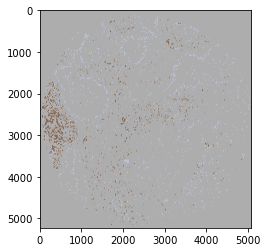

In [17]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(img2.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

In [18]:
centers

array([[173, 173, 173],
       [130, 101,  82],
       [188, 194, 215],
       [163, 140, 123]], dtype=uint8)

In [81]:
import numpy as np
for c in centers:
    print(np.sqrt(np.power(c[0],2)+np.power(c[1],2)+np.power(c[2],2)))

399.08144532162856
270.7988183135222
441.6729559300637


In [61]:
from math import sqrt

COLORS = (
    (255,255,0),
    (255,255,0)
)

def closest_color(centers):
    closest_color_ctrs=[]
    i=0
    for rgb in centers:
        r, g, b = rgb
        color_diffs_pctr = []
        for color in COLORS:
            cr, cg, cb = color
            color_diff = sqrt(abs(r - cr)**2 + abs(g - cg)**2 + abs(b - cb)**2)
            color_diffs_pctr.append((color_diff))
        closest_color_ctrs.append((min(color_diffs_pctr),i))
        i=i+1
    return min(closest_color_ctrs)[1]

In [62]:
closest_color(centers)

1

In [63]:
sg2=cv2.cvtColor(segmented_image,cv2.COLOR_RGB2BGR)
#sg2=cv2.medianBlur(sg2,15)
cv2.imwrite("C:\\Users\\Abu Bakr\\Desktop\\"+str(img_no)+"blurred_segmented_he.png",sg2)

True

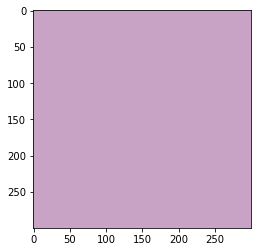

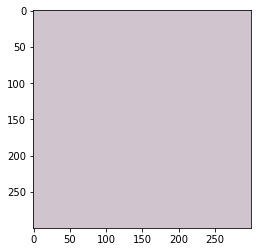

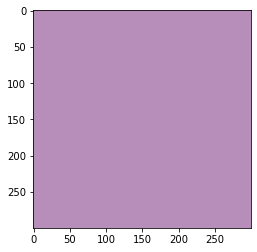

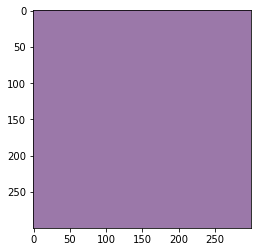

In [51]:
o=0
#path2="C:\\Users\\Abu Bakr\\Desktop\\segmented_c"
#os.makedirs(path2,exist_ok=True)
for a in centers:
    o=o+1
    image = np.zeros((300, 300, 3), np.uint8)
# Fill image with red color(set each pixel to red)
    image[:] = a
    plt.imshow(image)
    plt.show()
    image2=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
#    cv2.imwrite(path2+"\\"+str(o)+".png",image2)

In [40]:
img2.shape

(5528, 5304, 3)

In [82]:
#You can change this loop to remove only the one color, if you know which it is 

path3="../.."
os.makedirs(path3,exist_ok=True)
for i in range (k):
    temp = np.copy(img2) # segmented_image flattens the image, ie processes the image and brings down the number of 
                                    # colors to k colors and changes each cluster's color to the centroid
    
    #temp=np.copy(img2) #for real image
    # convert to the shape of a vector of pixel values
    temp = temp.reshape((-1, 3))
    # color (i.e cluster) to disable
    cluster = i
    #temp[labels == cluster] = [0, 0, 0] #for removing color belonging to a cluster
    
    temp[labels != cluster] = [0, 0, 0] # for removing any color not belonging to cluster
    
    
    #cv2.imwrite(path+"\\test"+str(i)+".png",temp)
    #temp[labels==cluster]=[255,255,255]
    #img3 = cv2.threshold(temp,38, 255,cv2.THRESH_BINARY)
    # convert back to original shape
    temp = temp.reshape(img2.shape)
    t2=cv2.cvtColor(temp,cv2.COLOR_RGB2BGR)
   # t2=cv2.medianBlur(t2,25)
    cv2.imwrite(path3+"/"+str(i)+".png",t2)
           

## Run upto here 

In [285]:
sg=cv2.cvtColor(segmented_image,cv2.COLOR_RGB2BGR)
#cv2.imwrite("C:\\Users\\Abu Bakr\\Desktop\\segmented\\"+str(img_no)+"\\ "+str(o)+" "+str(k)+".png",sg)
cv2.imwrite("C:\\Users\\Abu Bakr\\Desktop\\segmented\\segmented "+str(img_no)+".png",sg)

True

In [254]:
centers

array([[  0,   0,   0],
       [188, 193, 172],
       [165, 165, 157],
       [176, 179, 167],
       [  0,   0,   0]], dtype=uint8)

In [255]:
sg2=cv2.cvtColor(segmented_image,cv2.COLOR_RGB2BGR)
sg2=cv2.medianBlur(sg2,15)
cv2.imwrite("C:\\Users\\Abu Bakr\\Desktop\\segmented\\test\\"+str(img_no)+"blurred_segmented_if.png",sg2)

False

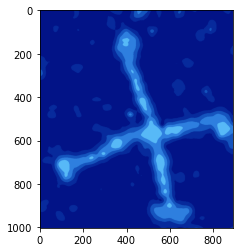

In [26]:
temp = np.copy(segmented_image)
temp=temp    # convert to the shape of a vector of pixel values
temp = temp.reshape((-1, 3))    # color (i.e cluster) to disable
cluster = 11
temp[labels == cluster] = [0, 0, 0]
temp = temp.reshape(img2.shape)
t2=cv2.cvtColor(temp,cv2.COLOR_BGR2RGB)
plt.imshow(t2)

In [27]:
sg2=cv2.cvtColor(t2,cv2.COLOR_BGR2RGB)
sg2=cv2.medianBlur(sg2,25)
cv2.imwrite("C:\\Users\\Abu Bakr\\Desktop\\segmented\\test\\blurred_segmented_no_white.png",sg2)

False

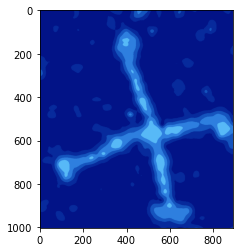

In [28]:
t2=cv2.cvtColor(temp,cv2.COLOR_RGB2BGR)
plt.imshow(t2)

In [15]:
r,g,b=cv2.split(img)

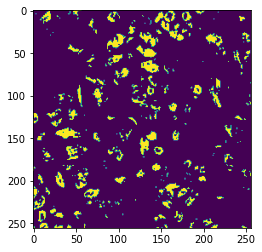

In [37]:
plt.imshow(np.array(255*(g-np.min(g))/(np.max(g)-np.min(g)),np.uint8))

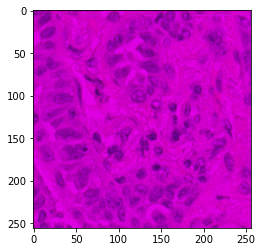

In [39]:
plt.imshow(cv2.merge([b,g_new,r]))

In [38]:
g_new=np.array(255*(g-np.min(g))/(np.max(g)-np.min(g)),np.uint8)